<a href="https://colab.research.google.com/github/rishavdps99/revenge/blob/master/Copy_of_FinalCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost

data=pd.read_csv('drive/My Drive/quandl.csv')
data=data.drop("ticker",axis=1)



In [0]:
data

array([[10141999, 51.25, 52.94, ..., 0.0, 52.38, '2/11/2018'],
       [10151999, 51.88, 52.25, ..., 0.0, 50.81, '2/11/2018'],
       [10181999, 51.13, 52.5, ..., 0.0, 52.13, '2/11/2018'],
       ...,
       [1022018, 85.8, 86.665, ..., 0.0, 86.46, '10/2/2018'],
       [1032018, 86.51, 86.89, ..., 0.0, 86.15, '10/3/2018'],
       [1042018, 85.5, 86.075, ..., 0.0, 85.58, '10/4/2018']],
      dtype=object)

In [0]:
data['date']=data['date'].str.replace('/','')
data['date']=data['date'].convert_objects(convert_numeric=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [0]:
data

array([[10141999, 51.25, 52.94, ..., 0.0, 52.38, '2/11/2018'],
       [10151999, 51.88, 52.25, ..., 0.0, 50.81, '2/11/2018'],
       [10181999, 51.13, 52.5, ..., 0.0, 52.13, '2/11/2018'],
       ...,
       [1022018, 85.8, 86.665, ..., 0.0, 86.46, '10/2/2018'],
       [1032018, 86.51, 86.89, ..., 0.0, 86.15, '10/3/2018'],
       [1042018, 85.5, 86.075, ..., 0.0, 85.58, '10/4/2018']],
      dtype=object)

In [0]:
data['lastupdated']=data['lastupdated'].str.replace('/','')
data['lastupdated']=data['lastupdated'].convert_objects(convert_numeric=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [0]:
data

,date,open,high,low,close,volume,dividends,closeunadj,lastupdated
0,1042018,85.500,86.075,85.250,85.58,9672193,0.0,85.58,1042018
1,1032018,86.510,86.890,85.975,86.15,9353832,0.0,86.15,1032018
2,1022018,85.800,86.665,85.622,86.46,7892508,0.0,86.46,1022018
3,1012018,85.350,86.030,85.255,85.81,8429007,0.0,85.81,1012018
4,9282018,85.250,85.930,84.990,85.02,9547284,0.0,85.02,9282018
5,9272018,86.085,86.375,85.590,85.77,7643185,0.0,85.77,9272018
6,9262018,86.020,86.500,85.690,85.78,9870046,0.0,85.78,9262018
7,9252018,87.031,87.360,86.370,86.50,11628788,0.0,86.50,9252018
8,9242018,85.790,87.085,85.720,86.60,13100023,0.0,86.60,9242018
9,9212018,85.010,85.430,84.520,85.17,26196749,0.0,85.17,9212018


In [0]:
def plot_corr(df,size=1000):
  corr = df.corr()
    ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

In [0]:
corr_matrix=data.corr()
corr_matrix

,date,open,high,low,close,volume,dividends,closeunadj,lastupdated
date,1.000000,0.001691,0.002053,0.002521,0.001972,-0.016758,-0.045715,-0.010088,0.044076
open,0.001691,1.000000,0.999497,0.999438,0.999021,0.109535,0.047680,0.795139,-0.153479
high,0.002053,0.999497,1.000000,0.999164,0.999514,0.119380,0.046761,0.795676,-0.154006
low,0.002521,0.999438,0.999164,1.000000,0.999441,0.098829,0.046888,0.796003,-0.152616
close,0.001972,0.999021,0.999514,0.999441,1.000000,0.109178,0.046361,0.796495,-0.153313
volume,-0.016758,0.109535,0.119380,0.098829,0.109178,1.000000,0.006927,0.015904,-0.152554
dividends,-0.045715,0.047680,0.046761,0.046888,0.046361,0.006927,1.000000,0.040335,0.001109
closeunadj,-0.010088,0.795139,0.795676,0.796003,0.796495,0.015904,0.040335,1.000000,0.109622
lastupdated,0.044076,-0.153479,-0.154006,-0.152616,-0.153313,-0.152554,0.001109,0.109622,1.000000


In [0]:
corr_matrix['close'].sort_values(ascending=False)

close          1.000000
high           0.999514
low            0.999441
open           0.999021
closeunadj     0.796495
volume         0.109178
dividends      0.046361
date           0.001972
lastupdated   -0.153313
Name: close, dtype: float64

In [0]:
X=data.iloc[:,[1,2,3]].values
Y=data.iloc[:,4].values


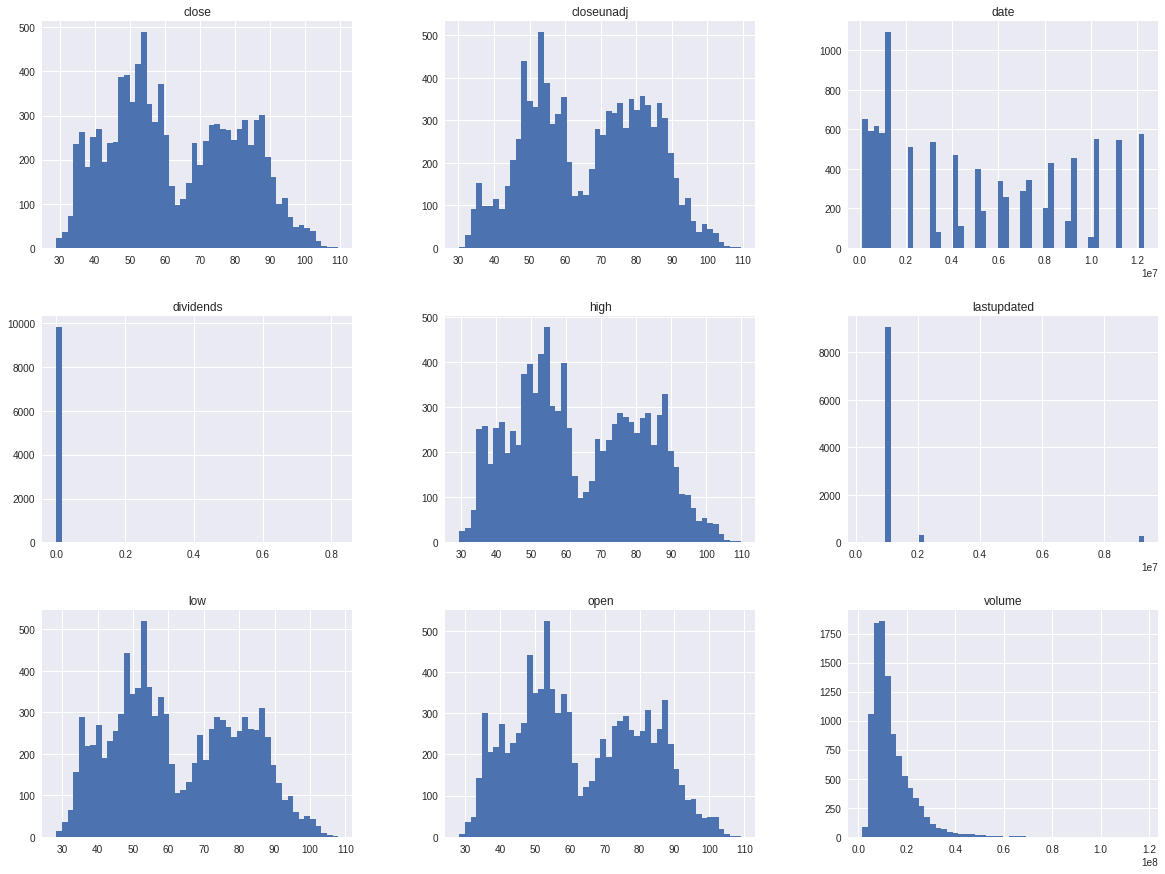

In [0]:
data.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [0]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [0]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
y_pred = regressor.predict(X_test)
print('Linear Regression R squared": %.4f' % regressor.score(X_test, y_test))

Linear Regression R squared": 0.9996


In [0]:
accuracy=regressor.score(X_test,y_test)
accuracy

0.9996015822352551

graph plotting

In [0]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [0]:
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))


Random Forest R squared": 0.9994


In [0]:
y_pred = forest_reg.predict(X)
accuracy=forest_reg.score(X_test,y_test)
accuracy*100

99.935984200062